# #ForestDiffusion

In [3]:
import numpy as np
import pandas as pd
from ForestDiffusion import ForestDiffusionModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score
from openTSNE import TSNE
import matplotlib.pyplot as plt

file_path = '/kaggle/working/Practice/diabetes.csv'
data = pd.read_csv(file_path)

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

#Separate minority class
X_minority = X[y == 1]

# Identify integer columns
int_columns = data.select_dtypes(include=['int']).columns
int_indexes = []
for col in int_columns:
    col_index = data.columns.get_loc(col)
    if col_index != 8:  # Skip column index 8
        int_indexes.append(col_index)

print(f"Integer column indices (excluding index 8): {int_indexes}")

#  Initialize ForestDiffusionModel with the integer columns
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100,
                                     bin_indexes=[], cat_indexes=[], int_indexes=int_indexes,
                                     diffusion_type='flow', n_jobs=-1)

#  Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X_minority))

#Save the generated samples
pd.DataFrame(X_minority_fake).to_csv('(diabetes)generated_minority_class (FD).csv', index=False)
print("Generated minority class data saved as (diabetes)generated_minority_class (FD).csv")

X_balanced = np.concatenate((X, X_minority_fake), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)

print(X_balanced.shape)
print(y_balanced.shape)
print(len(X_minority_fake))

unique, counts = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique, counts))
print(f"Class distribution after augmentation: {class_dist_after}")

Class distribution before augmentation: {0: 500, 1: 268}
Integer column indices (excluding index 8): [0, 1, 2, 3, 4, 7]
Generated minority class data saved as (diabetes)generated_minority_class (FD).csv
(1036, 8)
(1036,)
268
Class distribution after augmentation: {0.0: 500, 1.0: 536}


RandomForestClassifier

In [4]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

Recall score (original data): 0.5309
Recall score (generated data): 0.8889
F1 score (original data): 0.5972
F1 score (generated data): 0.7619


GradientBoostingClassifier

In [5]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

from sklearn.ensemble import GradientBoostingClassifier

clf_orig = GradientBoostingClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = GradientBoostingClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

Recall score (original data): 0.5432
Recall score (generated data): 0.8148
F1 score (original data): 0.6111
F1 score (generated data): 0.7458


XGBoostClassifier

In [9]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

from xgboost import XGBClassifier

clf_orig = XGBClassifier(n_estimators=100, random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = XGBClassifier(n_estimators=100, random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")


Recall score (original data): 0.5309
Recall score (generated data): 0.9012
F1 score (original data): 0.5733
F1 score (generated data): 0.7766


Recall score (original data): 0.6625
Recall score (generated data): 0.8875
F1 score (original data): 0.6503
F1 score (generated data): 0.8208


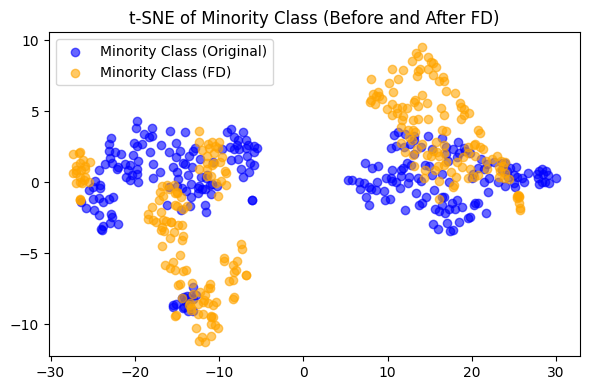

In [6]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")

# Apply openTSNE for t-SNE visualization
tsne = TSNE(
    n_components=2, perplexity=30, metric="euclidean",
    n_jobs=-1  # Use all available CPU cores for speedup
)

# Fit openTSNE on the PCA-reduced minority class data
X_tsne_minority = tsne.fit(X_minority)
X_tsne_res_minority = tsne.fit(X_minority_fake)

# Create t-SNE Plot for minority class before and after SMOTE
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot for original minority class data
ax.scatter(X_tsne_minority[:, 0], X_tsne_minority[:, 1], c='blue', label='Minority Class (Original)', alpha=0.6)
# Plot for SMOTE-generated synthetic minority class data
ax.scatter(X_tsne_res_minority[:, 0], X_tsne_res_minority[:, 1], c='orange', label='Minority Class (FD)', alpha=0.6)

# Add labels and legends
ax.set_title('t-SNE of Minority Class (Before and After FD)')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()




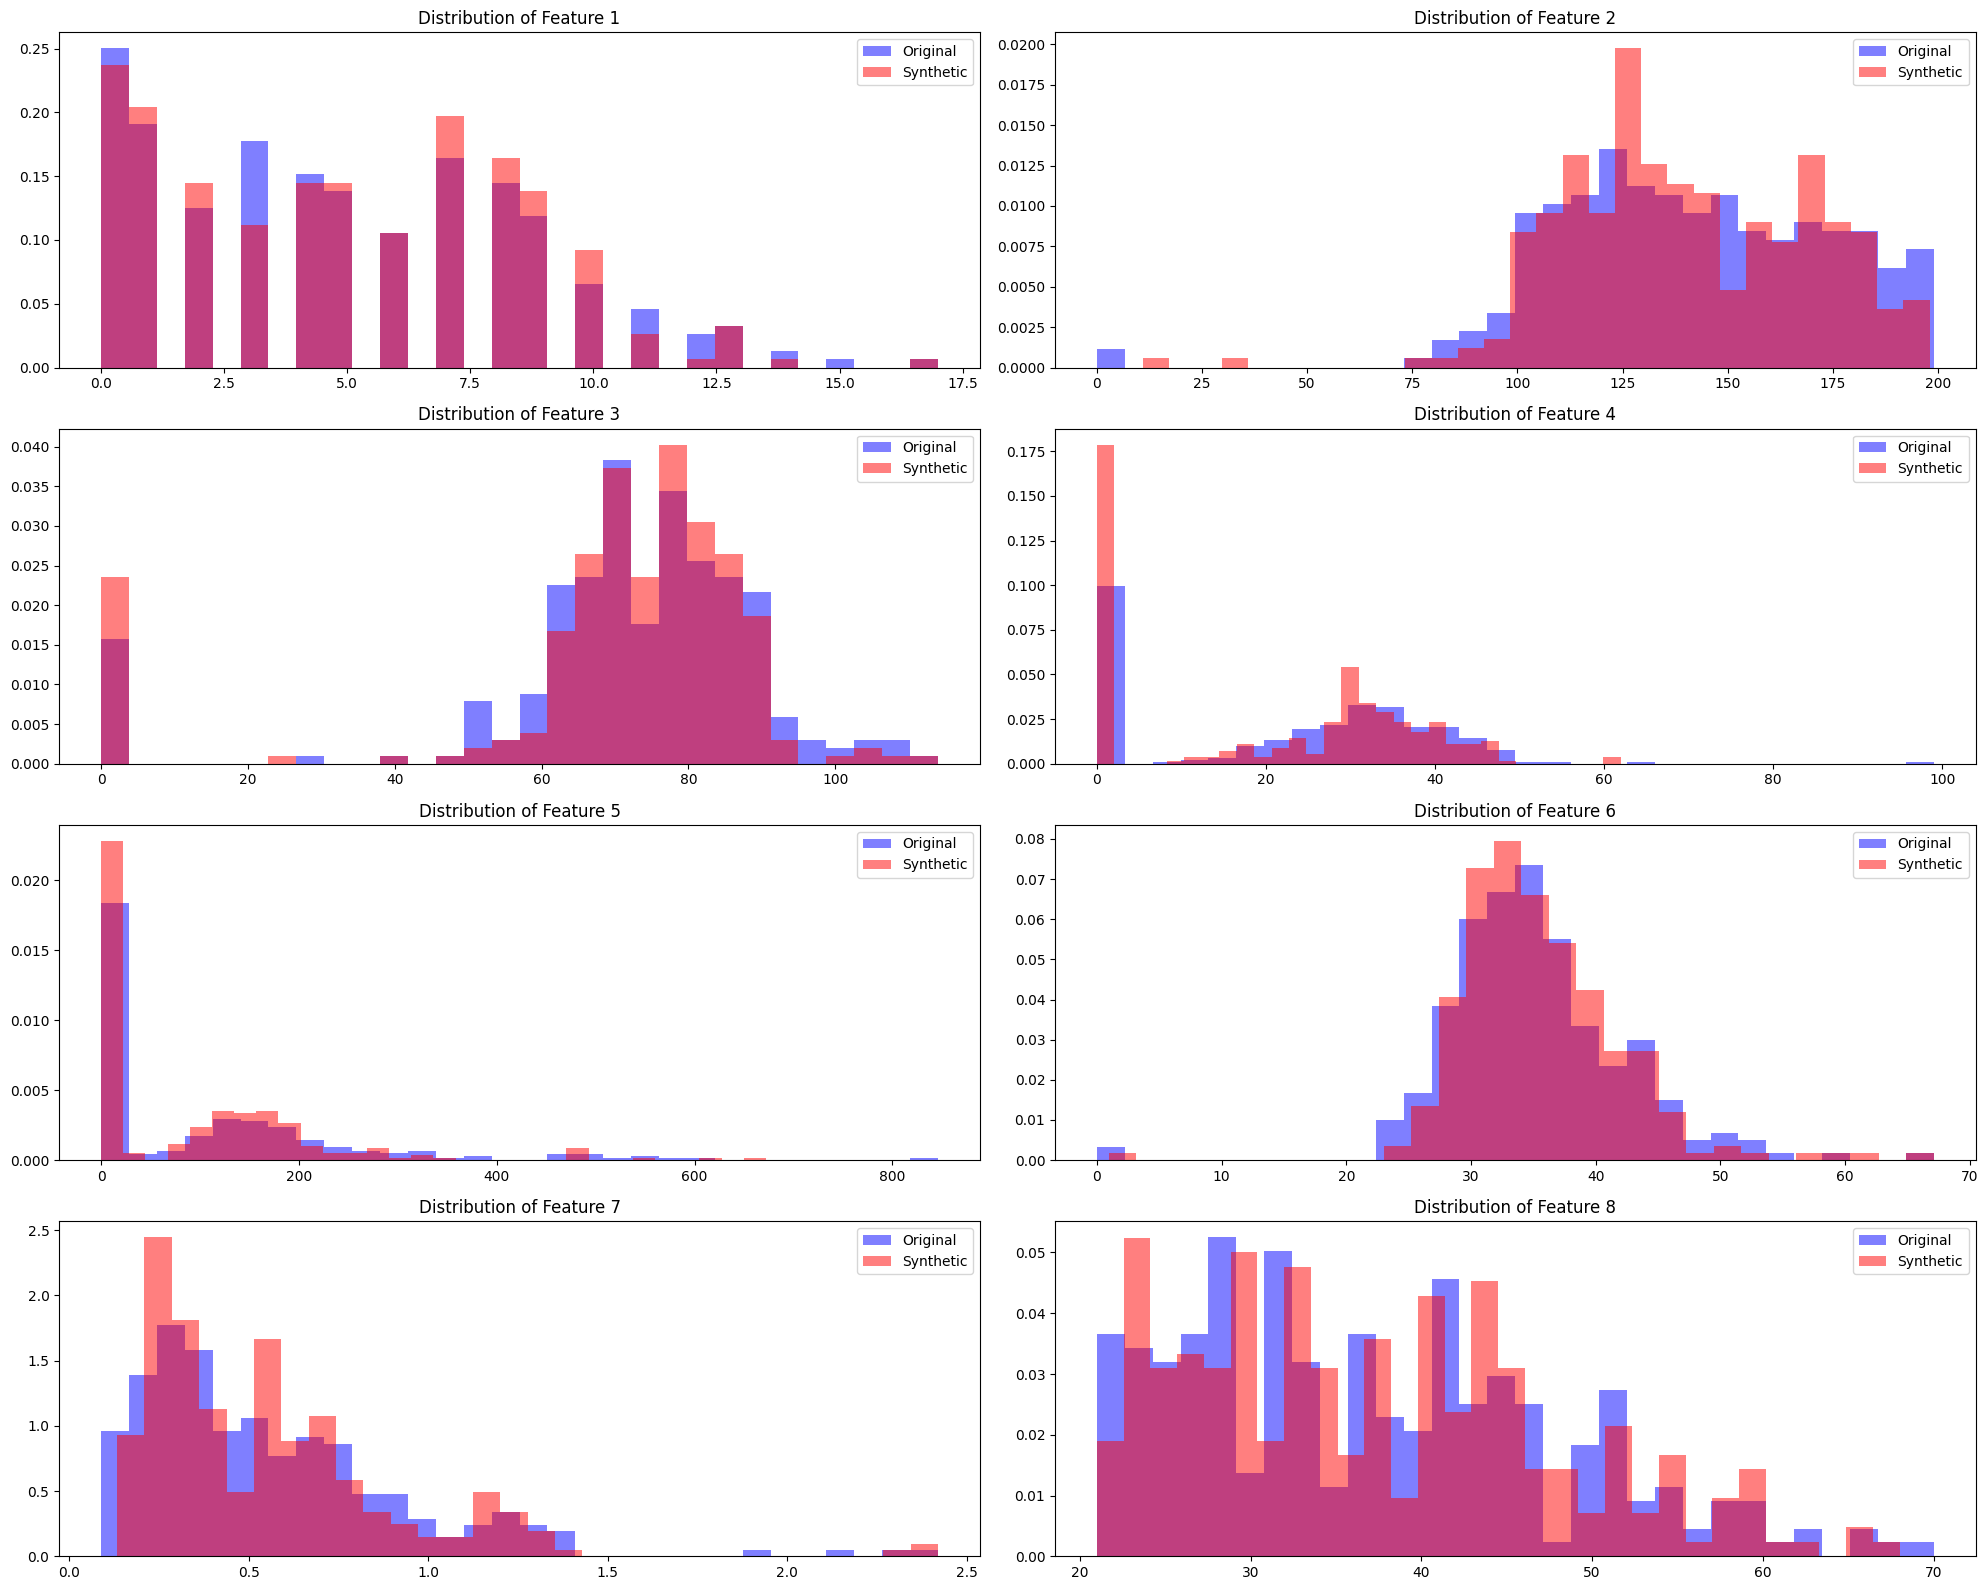

In [9]:
def plot_feature_distributions(original_data, synthetic_data, num_cols=2):
    num_features = original_data.shape[1]
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows

    plt.figure(figsize=(20, num_rows * 4))  # Adjust figure size dynamically

    for i in range(num_features):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Plot original data (blue)
        plt.hist(original_data.iloc[:, i], bins=30, alpha=0.5, label='Original', color='blue', density=True)
        
        # Plot synthetic data (red)
        plt.hist(synthetic_data.iloc[:, i], bins=30, alpha=0.5, label='Synthetic', color='red', density=True)
        
        plt.title(f'Distribution of Feature {i+1}')
        plt.legend()

    plt.tight_layout()
    plt.show()
X_minority_df = pd.DataFrame(X_minority)
X_minority_fake_df = pd.DataFrame(X_minority_fake)
plot_feature_distributions(X_minority_df, X_minority_fake_df)


# ForestDiffusion_CorrelationMatrix

In [3]:
import numpy as np
import pandas as pd
from ForestDiffusion import ForestDiffusionModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score
from openTSNE import TSNE
import matplotlib.pyplot as plt

file_path = '/kaggle/working/Practice/diabetes.csv'
data = pd.read_csv(file_path)

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

#Separate minority class
X_minority = X[y == 1]

# Identify integer columns
int_columns = data.select_dtypes(include=['int']).columns
int_indexes = []
for col in int_columns:
    col_index = data.columns.get_loc(col)
    if col_index != 8:  # Skip column index 8
        int_indexes.append(col_index)

print(f"Integer column indices (excluding index 8): {int_indexes}")

#  Initialize ForestDiffusionModel with the integer columns
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100,
                                     bin_indexes=[], cat_indexes=[], int_indexes=int_indexes,
                                     diffusion_type='flow', n_jobs=-1)

#  Generate synthetic data
X_minority_fake = forest_model.generate(batch_size=len(X_minority))

Class distribution before augmentation: {0: 500, 1: 268}
Integer column indices (excluding index 8): [0, 1, 2, 3, 4, 7]


In [4]:
#CM of original dataset
correlation_matrix = pd.DataFrame(X).corr()
print("Correlation Matrix of Original Data:")
print(correlation_matrix)

Correlation Matrix of Original Data:
          0         1         2         3         4         5         6  \
0  1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
1  0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
2  0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
3 -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
4 -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
5  0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
6 -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
7  0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   

          7  
0  0.544341  
1  0.263514  
2  0.239528  
3 -0.113970  
4 -0.042163  
5  0.036242  
6  0.033561  
7  1.000000  


In [16]:
# Function to adjust the correlations of the generated data
def adjust_correlation(X, target_corr_matrix):
    
    # Calculate the Cholesky decomposition of the target correlation matrix
    L = np.linalg.cholesky(target_corr_matrix)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Transform the data to match the target correlation structure
    X_transformed = np.dot(X_centered, L.T)
    
    return X_transformed + np.mean(X, axis=0)

# Step 6: Adjust the synthetic data to match the original data's correlation matrix
X_minority_fake_adjusted = adjust_correlation(X_minority_fake, correlation_matrix)

pd.DataFrame(X_minority_fake_adjusted).to_csv('(diabetes) generated_minority_class_FD_CM.csv', index=False)


correlation_matrix_adjusted = pd.DataFrame(X_minority_fake_adjusted).corr()
print("Correlation Matrix of Synthetic Minority Data:")
print(correlation_matrix_adjusted)

X_balanced = np.concatenate((X, X_minority_fake_adjusted), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake_adjusted.shape[0])), axis=0)

# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

Correlation Matrix of Synthetic Minority Data:
          0         1         2         3         4         5         6  \
0  1.000000  0.024840  0.233085 -0.020554  0.017171 -0.014728 -0.005629   
1  0.024840  1.000000  0.286452  0.099837  0.260127  0.521952  0.466061   
2  0.233085  0.286452  1.000000  0.525644  0.207738  0.679977  0.329798   
3 -0.020554  0.099837  0.525644  1.000000  0.581514  0.685810  0.693587   
4  0.017171  0.260127  0.207738  0.581514  1.000000  0.206942  0.955483   
5 -0.014728  0.521952  0.679977  0.685810  0.206942  1.000000  0.449315   
6 -0.005629  0.466061  0.329798  0.693587  0.955483  0.449315  1.000000   
7  0.509454  0.519780  0.482344 -0.176144 -0.181260  0.261585 -0.068285   

          7  
0  0.509454  
1  0.519780  
2  0.482344  
3 -0.176144  
4 -0.181260  
5  0.261585  
6 -0.068285  
7  1.000000  
Class distribution after augmentation: {0.0: 500, 1.0: 536}


In [13]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recall_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recall_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")


Recall score (original data): 0.5309
Recall score (generated data): 0.8148
F1 score (original data): 0.5972
F1 score (generated data): 0.7811


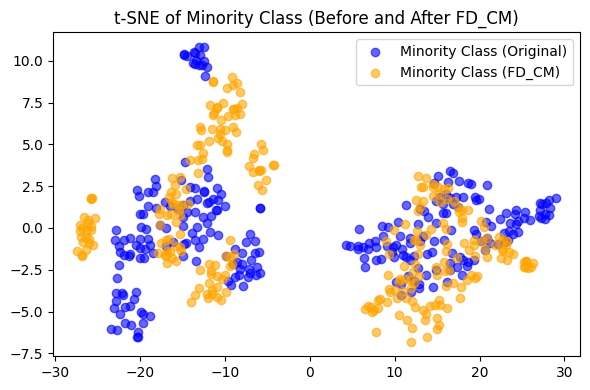

In [14]:
# Apply openTSNE for t-SNE visualization
tsne = TSNE(
    n_components=2, perplexity=30, metric="euclidean",
    n_jobs=-1  # Use all available CPU cores for speedup
)

# Fit openTSNE on the PCA-reduced minority class data
X_tsne_minority = tsne.fit(X_minority)
X_tsne_res_minority = tsne.fit(X_minority_fake_adjusted)

# Create t-SNE Plot for minority class before and after SMOTE
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot for original minority class data
ax.scatter(X_tsne_minority[:, 0], X_tsne_minority[:, 1], c='blue', label='Minority Class (Original)', alpha=0.6)
# Plot for SMOTE-generated synthetic minority class data
ax.scatter(X_tsne_res_minority[:, 0], X_tsne_res_minority[:, 1], c='orange', label='Minority Class (FD_CM)', alpha=0.6)

# Add labels and legends
ax.set_title('t-SNE of Minority Class (Before and After FD_CM)')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


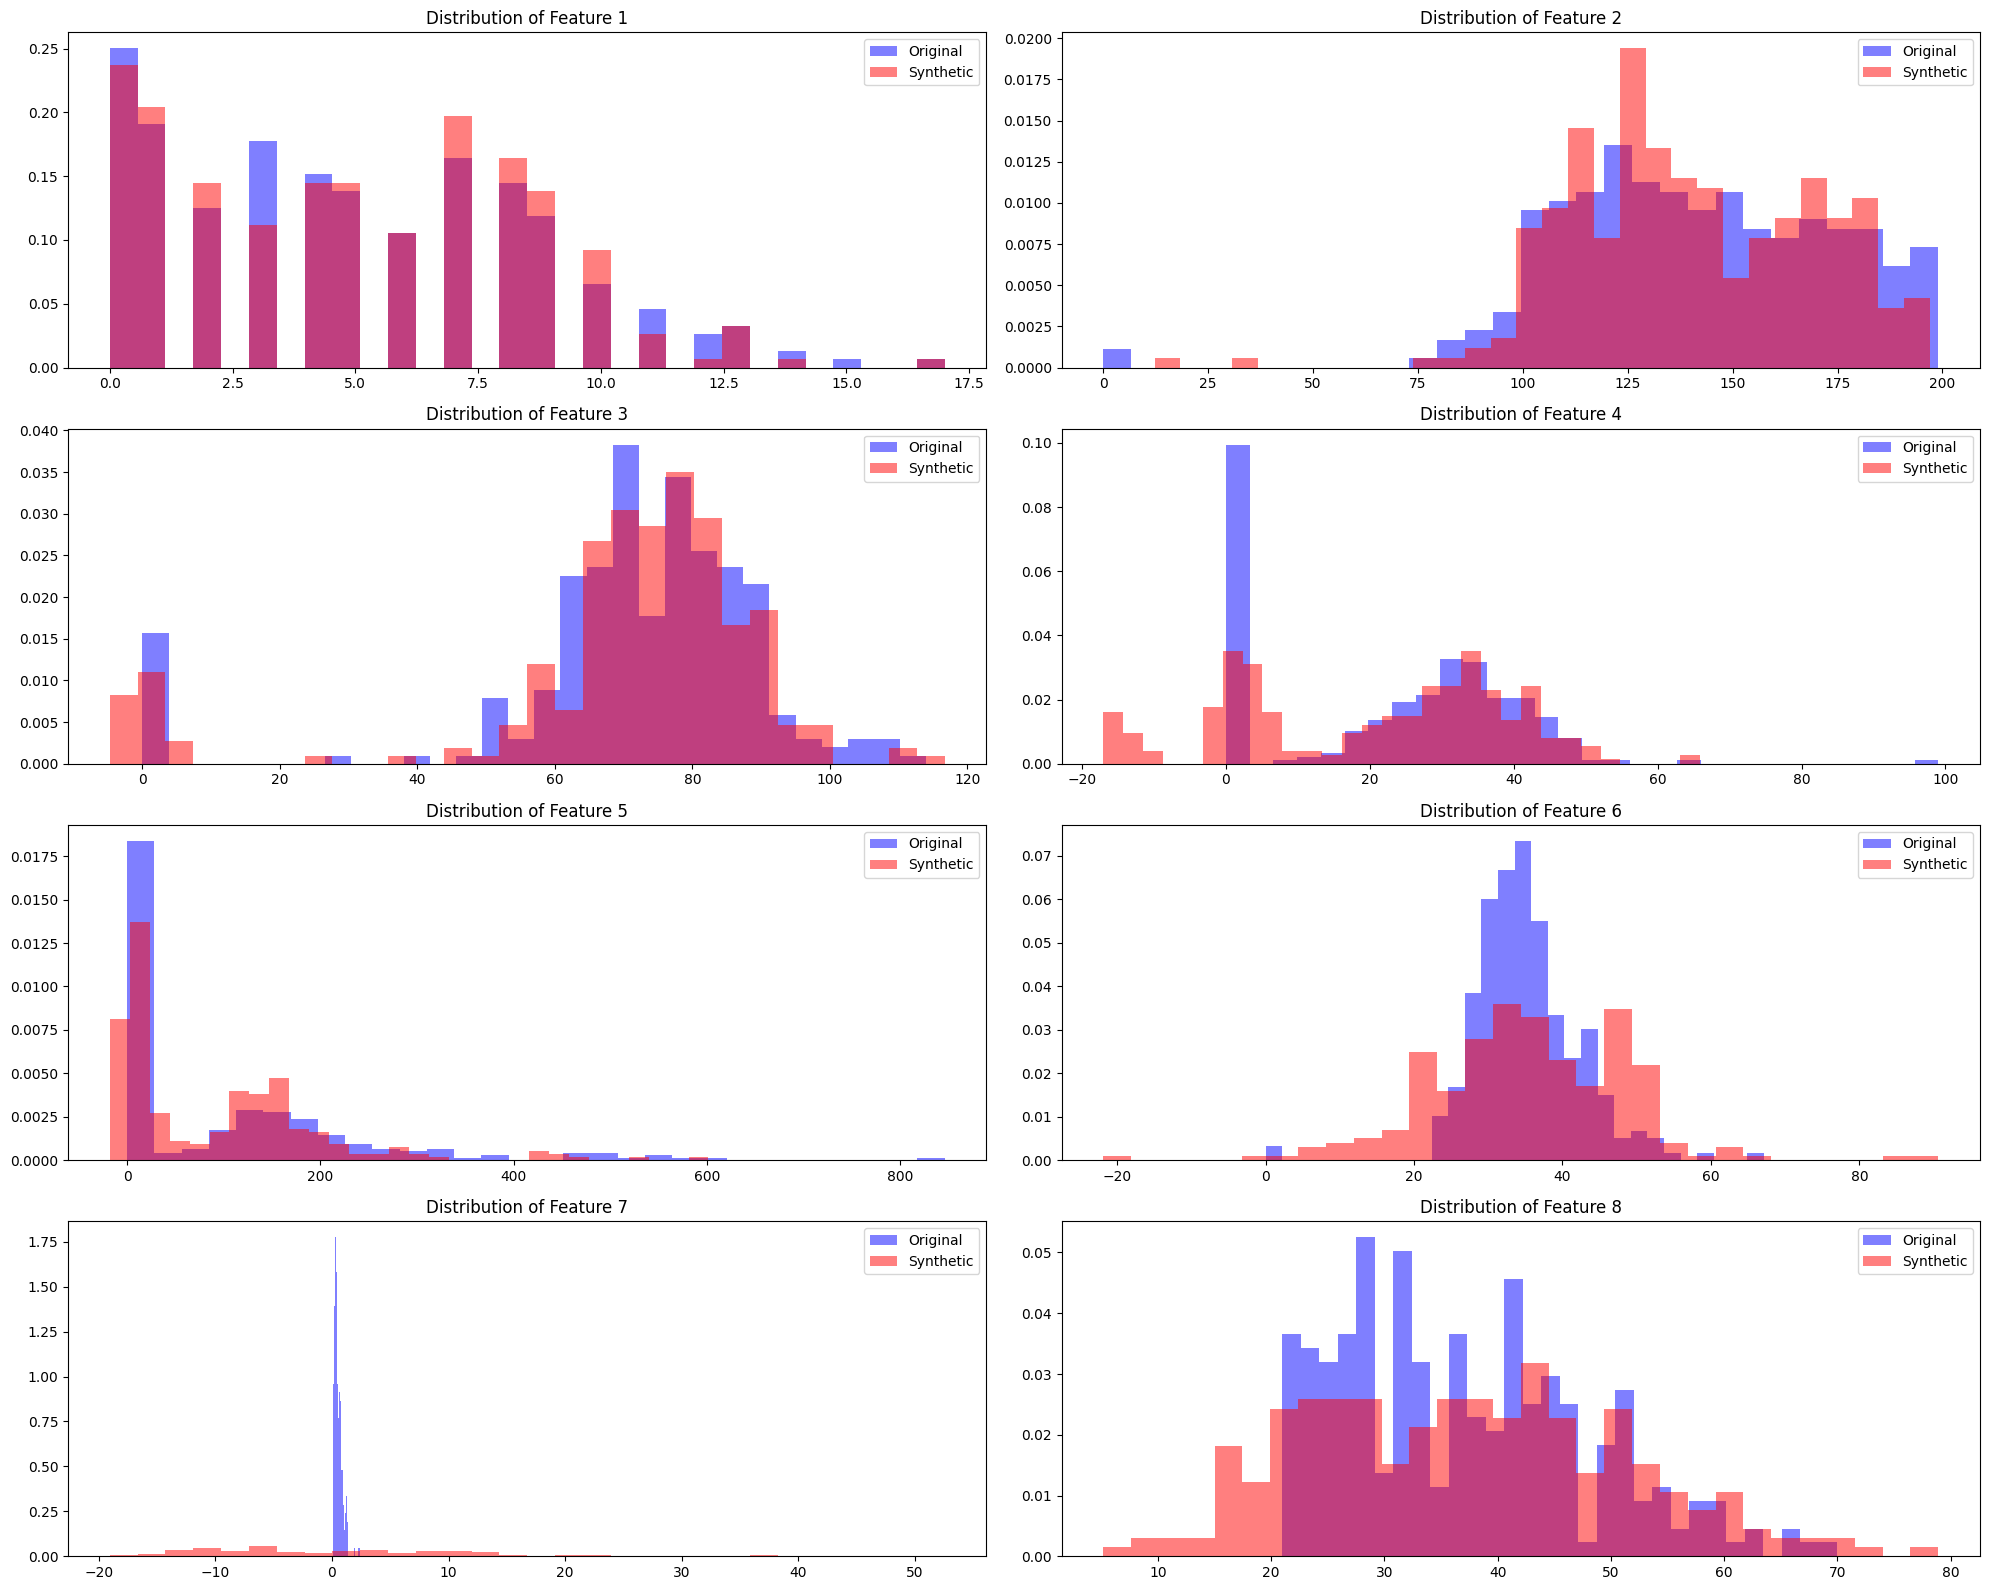

In [11]:
def plot_feature_distributions(original_data, synthetic_data, num_cols=2):
    num_features = original_data.shape[1]
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows

    plt.figure(figsize=(20, num_rows * 4))  # Adjust figure size dynamically

    for i in range(num_features):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Plot original data (blue)
        plt.hist(original_data.iloc[:, i], bins=30, alpha=0.5, label='Original', color='blue', density=True)
        
        # Plot synthetic data (red)
        plt.hist(synthetic_data.iloc[:, i], bins=30, alpha=0.5, label='Synthetic', color='red', density=True)
        
        plt.title(f'Distribution of Feature {i+1}')
        plt.legend()

    plt.tight_layout()
    plt.show()
X_minority_df = pd.DataFrame(X_minority)
X_minority_fake_df = pd.DataFrame(X_minority_fake_adjusted)
plot_feature_distributions(X_minority_df, X_minority_fake_df)